In [95]:
import bs4
import numpy as np
import pandas as pd

from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

In [96]:
my_url = 'https://www.newegg.com/Desktop-Graphics-Cards/SubCategory/ID-48'
##opening connection and grabbing page
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()

In [97]:
page_soup = soup(page_html, 'html.parser')
page_soup.h1

<h1 class="page-title-text">Desktop Graphics Cards</h1>

In [98]:
containers = page_soup.findAll('div',{'class':'item-container'})
len(containers)

37

In [99]:
containers[0]

<div class="item-container items-list-view"><a class="item-img" href="https://www.newegg.com/msi-radeon-rx-570-rx-570-8gt-oc/p/N82E16814137521"><img alt="MSI Radeon RX 570 DirectX 12 RX 570 8GT OC 8GB 256-Bit GDDR5 PCI Express x16 (Uses x8) HDCP Ready ATX Video Card" src="https://c1.neweggimages.com/ProductImageCompressAll300/14-137-521-V01.jpg" title="MSI Radeon RX 570 DirectX 12 RX 570 8GT OC 8GB 256-Bit GDDR5 PCI Express x16 (Uses x8) HDCP Ready ATX Video Card"/></a><div class="item-info"><div class="item-branding"><a class="item-brand" href="https://www.newegg.com/MSI/BrandStore/ID-1312"><img alt="MSI" src="https://c1.neweggimages.com/Brandimage_70x28/Brand1312.gif" title="MSI"/></a><a class="item-rating" href="https://www.newegg.com/msi-radeon-rx-570-rx-570-8gt-oc/p/N82E16814137521?Item=N82E16814137521&amp;IsFeedbackTab=true#scrollFullInfo" title="Rating + 4"><i class="rating rating-4"></i><span class="item-rating-num">(134)</span></a></div><a class="item-title" href="https://www.

In [100]:
container = containers[0]
container.div.div.a.img['title']

'MSI'

In [101]:
brands = []
product_names = []
prices = []
shipping_cost = []
for container in containers:
    brand = container.div.div.a.img['title']
    brands.append(brand)
    
    title_container = container.findAll('a',{'class':'item-title'})
    product_name = title_container[0].text
    product_names.append(product_name)
    
    price_container = container.findAll('ul',{'class':'price'})
    price = price_container[0].text.strip()
    prices.append(price)
    
    shipping_container = container.findAll('li',{'class':'price-ship'})
    shipping = shipping_container[0].text.strip()
    shipping_cost.append(shipping)
    


In [102]:
df_brands = pd.DataFrame(brands, columns = ['brand_name'])
df_products = pd.DataFrame(product_names, columns = ['products'])
df_prices = pd.DataFrame(prices)
df_shipping = pd.DataFrame(shipping_cost, columns = ['shipping'])
type(df_shipping)

pandas.core.frame.DataFrame

In [103]:
df_brands['products'] , df_brands['prices'], df_brands['shipping'] = [df_products, df_prices, df_shipping]
df_brands

,brand_name,products,prices,shipping
0,MSI,MSI Radeon RX 570 DirectX 12 RX 570 8GT OC 8GB...,$144.99 –Free Shipping,Free Shipping
1,MSI,MSI GeForce GTX 1660 SUPER DirectX 12 GTX 1660...,$249.99 (8 Offers)–Free Shipping,Free Shipping
2,GIGABYTE,GIGABYTE GeForce RTX 2070 Super WINDFORCE OC 3...,$499.99 (6 Offers)–Free Shipping,Free Shipping
3,EVGA,"EVGA GeForce RTX 2060 KO GAMING Video Card, 06...",$309.99 (17 Offers)–$3.99 Shipping,$3.99 Shipping
4,ASRock,ASRock Phantom Gaming D Radeon RX 570 DirectX ...,$139.99 $134.99 –$3.99 Shipping,$3.99 Shipping
5,GIGABYTE,"GIGABYTE Geforce RTX 2060 OC 6G Graphics Card,...",$319.99 (2 Offers)–Free Shipping,Free Shipping
6,EVGA,EVGA GeForce RTX 2070 SUPER KO GAMING Video Ca...,$524.99 (16 Offers)–$8.35 Shipping,$8.35 Shipping
7,EVGA,EVGA GeForce RTX 2060 KO ULTRA GAMING Video Ca...,$329.99 (16 Offers)–$3.99 Shipping,$3.99 Shipping
8,ASUS,ASUS ROG STRIX AMD Radeon RX 5700 XT Overclock...,$459.99 (2 Offers)–Free Shipping,Free Shipping
9,ASUS,ASUS ROG Strix Radeon RX 570 DirectX 12 ROG-ST...,$199.99 $174.99 (4 Offers)–Save: 13%Free Shipping,Free Shipping


In [104]:
df_brands['product']= df_brands['products'].str.split(',',expand=True)[0]
df_brands.head(5)

,brand_name,products,prices,shipping,product
0,MSI,MSI Radeon RX 570 DirectX 12 RX 570 8GT OC 8GB...,$144.99 –Free Shipping,Free Shipping,MSI Radeon RX 570 DirectX 12 RX 570 8GT OC 8GB...
1,MSI,MSI GeForce GTX 1660 SUPER DirectX 12 GTX 1660...,$249.99 (8 Offers)–Free Shipping,Free Shipping,MSI GeForce GTX 1660 SUPER DirectX 12 GTX 1660...
2,GIGABYTE,GIGABYTE GeForce RTX 2070 Super WINDFORCE OC 3...,$499.99 (6 Offers)–Free Shipping,Free Shipping,GIGABYTE GeForce RTX 2070 Super WINDFORCE OC 3...
3,EVGA,"EVGA GeForce RTX 2060 KO GAMING Video Card, 06...",$309.99 (17 Offers)–$3.99 Shipping,$3.99 Shipping,EVGA GeForce RTX 2060 KO GAMING Video Card
4,ASRock,ASRock Phantom Gaming D Radeon RX 570 DirectX ...,$139.99 $134.99 –$3.99 Shipping,$3.99 Shipping,ASRock Phantom Gaming D Radeon RX 570 DirectX ...


In [105]:
df_p = df_brands['prices'].str.split(expand=True)
df_price = df_p[0].str.split('$',expand=True)
df_brands['price'] = df_price[1]
df_brands.head(5)

,brand_name,products,prices,shipping,product,price
0,MSI,MSI Radeon RX 570 DirectX 12 RX 570 8GT OC 8GB...,$144.99 –Free Shipping,Free Shipping,MSI Radeon RX 570 DirectX 12 RX 570 8GT OC 8GB...,144.99
1,MSI,MSI GeForce GTX 1660 SUPER DirectX 12 GTX 1660...,$249.99 (8 Offers)–Free Shipping,Free Shipping,MSI GeForce GTX 1660 SUPER DirectX 12 GTX 1660...,249.99
2,GIGABYTE,GIGABYTE GeForce RTX 2070 Super WINDFORCE OC 3...,$499.99 (6 Offers)–Free Shipping,Free Shipping,GIGABYTE GeForce RTX 2070 Super WINDFORCE OC 3...,499.99
3,EVGA,"EVGA GeForce RTX 2060 KO GAMING Video Card, 06...",$309.99 (17 Offers)–$3.99 Shipping,$3.99 Shipping,EVGA GeForce RTX 2060 KO GAMING Video Card,309.99
4,ASRock,ASRock Phantom Gaming D Radeon RX 570 DirectX ...,$139.99 $134.99 –$3.99 Shipping,$3.99 Shipping,ASRock Phantom Gaming D Radeon RX 570 DirectX ...,139.99


In [106]:
dfa = df_brands['shipping'].str.split(expand=True)
dfb = dfa[0].replace(to_replace='Free',value='$0')
dfc = dfb.str.split('$', expand=True)
df_brands['shipping_cost'] = dfc[1]
df_brands.head(5)

,brand_name,products,prices,shipping,product,price,shipping_cost
0,MSI,MSI Radeon RX 570 DirectX 12 RX 570 8GT OC 8GB...,$144.99 –Free Shipping,Free Shipping,MSI Radeon RX 570 DirectX 12 RX 570 8GT OC 8GB...,144.99,0
1,MSI,MSI GeForce GTX 1660 SUPER DirectX 12 GTX 1660...,$249.99 (8 Offers)–Free Shipping,Free Shipping,MSI GeForce GTX 1660 SUPER DirectX 12 GTX 1660...,249.99,0
2,GIGABYTE,GIGABYTE GeForce RTX 2070 Super WINDFORCE OC 3...,$499.99 (6 Offers)–Free Shipping,Free Shipping,GIGABYTE GeForce RTX 2070 Super WINDFORCE OC 3...,499.99,0
3,EVGA,"EVGA GeForce RTX 2060 KO GAMING Video Card, 06...",$309.99 (17 Offers)–$3.99 Shipping,$3.99 Shipping,EVGA GeForce RTX 2060 KO GAMING Video Card,309.99,3.99
4,ASRock,ASRock Phantom Gaming D Radeon RX 570 DirectX ...,$139.99 $134.99 –$3.99 Shipping,$3.99 Shipping,ASRock Phantom Gaming D Radeon RX 570 DirectX ...,139.99,3.99


In [107]:
story_data = df_brands[['brand_name','product','price','shipping_cost']]
story_data['price'] = story_data['price'].astype(float)
story_data['shipping_cost'] = story_data['shipping_cost'].astype(float)
story_data.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,brand_name,product,price,shipping_cost
0,MSI,MSI Radeon RX 570 DirectX 12 RX 570 8GT OC 8GB...,144.99,0.00
1,MSI,MSI GeForce GTX 1660 SUPER DirectX 12 GTX 1660...,249.99,0.00
2,GIGABYTE,GIGABYTE GeForce RTX 2070 Super WINDFORCE OC 3...,499.99,0.00
3,EVGA,EVGA GeForce RTX 2060 KO GAMING Video Card,309.99,3.99
4,ASRock,ASRock Phantom Gaming D Radeon RX 570 DirectX ...,139.99,3.99


In [108]:
brand_no = len(story_data['brand_name'].unique())
print(f'There are {brand_no} brands in the data')

There are 7 brands in the data


In [109]:
#EVGA seems to be an expensive brand

brand = story_data.sort_values(by=['price'],ascending=False).head(7)
brand

,brand_name,product,price,shipping_cost
11,EVGA,EVGA GeForce RTX 2070 SUPER XC ULTRA GAMING,569.99,6.99
28,MSI,MSI GeForce RTX 2070 SUPER DirectX 12 RTX 2070...,549.99,0.00
26,EVGA,EVGA GeForce RTX 2070 SUPER BLACK GAMING,534.99,0.00
6,EVGA,EVGA GeForce RTX 2070 SUPER KO GAMING Video Card,524.99,8.35
2,GIGABYTE,GIGABYTE GeForce RTX 2070 Super WINDFORCE OC 3...,499.99,0.00
32,ASRock,ASRock Radeon RX 5700 XT DirectX 12 RX 5700 XT...,479.99,3.99
8,ASUS,ASUS ROG STRIX AMD Radeon RX 5700 XT Overclock...,459.99,0.00


EVGA seems to be an expensive brand


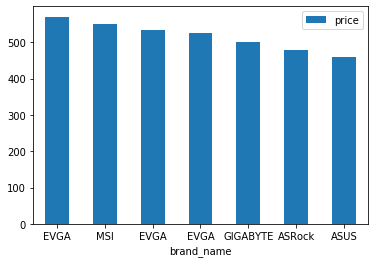

In [110]:
brand[['brand_name','price']].plot(kind='bar',x='brand_name',rot=0)
print('EVGA seems to be an expensive brand')

In [111]:
no_shipping_cost = len(story_data.loc[story_data['shipping_cost'] == 0])
print(f'There are {no_shipping_cost} products with no shipping cost')

There are 22 products with no shipping cost


In [112]:
story_data.sort_values(by=['shipping_cost'],ascending=False).head(5)

,brand_name,product,price,shipping_cost
6,EVGA,EVGA GeForce RTX 2070 SUPER KO GAMING Video Card,524.99,8.35
11,EVGA,EVGA GeForce RTX 2070 SUPER XC ULTRA GAMING,569.99,6.99
32,ASRock,ASRock Radeon RX 5700 XT DirectX 12 RX 5700 XT...,479.99,3.99
24,EVGA,EVGA GeForce GTX 1650 KO ULTRA GDDR6 GAMING,169.99,3.99
13,EVGA,EVGA GeForce GTX 1650 SUPER SC ULTRA GAMING Vi...,189.99,3.99


In [113]:
print('For good with no free shipping, shipping costs about 1 to 3 percent of the price')
story_data['shipping_rate']= (story_data['shipping_cost']/story_data['price']).round(decimals=2)
story_data.head(5)

For good with no free shipping, shipping costs about 1 to 3 percent of the price


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,brand_name,product,price,shipping_cost,shipping_rate
0,MSI,MSI Radeon RX 570 DirectX 12 RX 570 8GT OC 8GB...,144.99,0.00,0.00
1,MSI,MSI GeForce GTX 1660 SUPER DirectX 12 GTX 1660...,249.99,0.00,0.00
2,GIGABYTE,GIGABYTE GeForce RTX 2070 Super WINDFORCE OC 3...,499.99,0.00,0.00
3,EVGA,EVGA GeForce RTX 2060 KO GAMING Video Card,309.99,3.99,0.01
4,ASRock,ASRock Phantom Gaming D Radeon RX 570 DirectX ...,139.99,3.99,0.03


There is no obvious relationship between prices and shipping i.e. shipping cost waiver are not based on the price of the cards. There are expensive cards with free shipping and cheap cards with shipping cost.
However, since shipping is rates around 1 to 3% of the prices for the goods without free shipping, it then follows that the absolute cost/value of expensive cards are more that those that are cheap

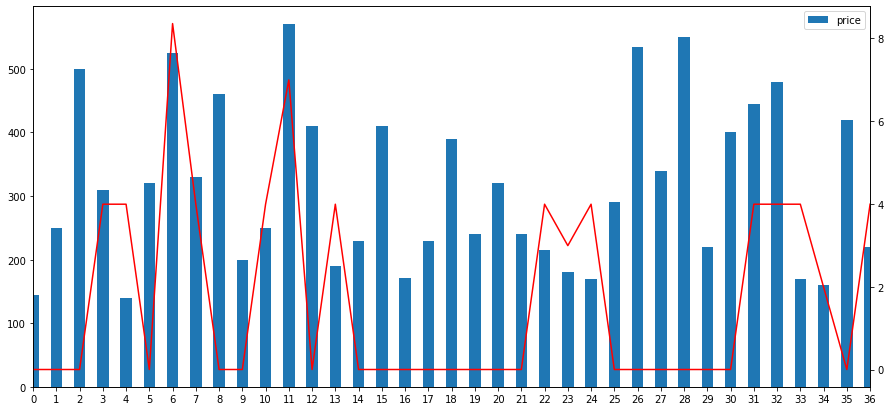

In [114]:
import matplotlib.pyplot as plt
story_data[['brand_name', 'price']].plot(kind='bar',figsize=(15,7))
story_data['shipping_cost'].plot(secondary_y=True,color='r')